## **PCA eg 3**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('mnist1.5k.csv')       # this is a img data, where texts are written in pixels
print(df.shape) 
df.head(5)


(1500, 785)


,Label,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 775,Pixel 776,Pixel 777,Pixel 778,Pixel 779,Pixel 780,Pixel 781,Pixel 782,Pixel 783,Pixel 784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


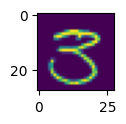

In [3]:
plt.figure(figsize=(1,1))
plt.imshow(df.iloc[7, 1:].values.reshape(28,28))

### **Type 1 - using conventional method**

In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,0]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)


# importing time module to check how much time it takes to train the model
import time
start = time.time()
print('SCONDS --> ', time.time() - start)

y_pred = knn.predict(X_test)
print(f"ACCURACY : {accuracy_score(y_test, y_pred)}")

SCONDS -->  3.0279159545898438e-05
ACCURACY : 0.8433333333333334


### **Type 2 - using PCA**

In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,0]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=3)        # If you write 'None' here, then it will create the number of PCA same as the total number of features in the data

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

X_train_trf.shape

(1200, 3)

In [12]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf, y_train)
y_pred = knn.predict(X_test_trf)

print(f"ACCURACY : {accuracy_score(y_test, y_pred)}")


ACCURACY : 0.4866666666666667


In [8]:
"""
best_accuracy = 0
best_i = 0

for i in range(1, 785):
    pca = PCA(n_components=i)

    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred = knn.predict(X_test_trf)

    acc = accuracy_score(y_test, y_pred)
    
    # finding the best iteration with highest accuracy
    if acc > best_accuracy:
        best_accracy = acc
        best_i = i
            

print(f"THE ITERATION {i} IS WITH THE HIGHEEST ACCURACY OF {best_accuracy}")



"""

'\nbest_accuracy = 0\nbest_i = 0\n\nfor i in range(1, 785):\n    pca = PCA(n_components=i)\n\n    X_train_trf = pca.fit_transform(X_train)\n    X_test_trf = pca.transform(X_test)\n\n    knn = KNeighborsClassifier()\n    knn.fit(X_train_trf, y_train)\n    y_pred = knn.predict(X_test_trf)\n\n    acc = accuracy_score(y_test, y_pred)\n\n    # finding the best iteration with highest accuracy\n    if acc > best_accuracy:\n        best_accracy = acc\n        best_i = i\n\n\nprint(f"THE ITERATION {i} IS WITH THE HIGHEEST ACCURACY OF {best_accuracy}")\n\n\n\n'

In [13]:
# if you want to have optimum 2D visual, convert the PCI = 2  and change it to 3 if you want to have 3D visual
import plotly.express as px
y_train_trf = y_train.astype(str)

fig = px.scatter(       #for 3D write scatter_3D and put x, y, and z values
    x=X_train_trf[:, 0], 
    y=X_train_trf[:, 1], 
    color=y_train_trf, 
    color_discrete_sequence=px.colors.qualitative.G10
    )

fig.show()

In [ ]:
pca.explained_variance_     # eigen values 

array([41.45509992, 29.38563022, 28.43284459])

In [ ]:
pca.components_             # this is the eigen vector (here the eigen value inside somewhere)

array([[-1.98108478e-18,  1.78087550e-19, -5.29233164e-21, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.55012290e-18,  5.04177655e-17, -1.25300459e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.77737021e-16,  4.43528911e-17,  8.24302555e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
pca.components_.shape   

(3, 784)

In [20]:
pca = PCA(n_components=None)        

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

print(pca.explained_variance_)


[4.14550999e+01 2.93856303e+01 2.84328446e+01 2.08567766e+01
 1.79126811e+01 1.66496603e+01 1.32380844e+01 1.29273141e+01
 1.22377194e+01 1.07502028e+01 9.90230540e+00 9.22280696e+00
 8.60598663e+00 8.15799852e+00 8.06911465e+00 7.67451279e+00
 7.49038800e+00 7.08894574e+00 6.77374669e+00 6.69560368e+00
 6.22608511e+00 6.20587553e+00 6.01761147e+00 5.79541961e+00
 5.64761982e+00 5.60317504e+00 5.17879492e+00 5.02237104e+00
 4.91249618e+00 4.82426863e+00 4.66533873e+00 4.59458412e+00
 4.45242870e+00 4.39843658e+00 4.30865582e+00 4.24107433e+00
 4.13011285e+00 4.06251822e+00 4.04650124e+00 3.93821904e+00
 3.70475069e+00 3.63433669e+00 3.59865818e+00 3.51394153e+00
 3.44759801e+00 3.36734828e+00 3.30318527e+00 3.18283962e+00
 3.12335526e+00 3.06261773e+00 3.05249892e+00 3.00940127e+00
 2.87148504e+00 2.82309954e+00 2.77049905e+00 2.73278845e+00
 2.71047432e+00 2.67125571e+00 2.57964764e+00 2.55830748e+00
 2.48938878e+00 2.42188239e+00 2.41483670e+00 2.36323448e+00
 2.32296416e+00 2.253954

In [21]:
print(pca.components_.shape)
print(pca.explained_variance_ratio_)

(784, 784)
[6.75702349e-02 4.78974588e-02 4.63444545e-02 3.39957519e-02
 2.91969883e-02 2.71383125e-02 2.15775737e-02 2.10710299e-02
 1.99470168e-02 1.75224214e-02 1.61403809e-02 1.50328243e-02
 1.40274306e-02 1.32972271e-02 1.31523497e-02 1.25091637e-02
 1.22090473e-02 1.15547117e-02 1.10409493e-02 1.09135791e-02
 1.01482817e-02 1.01153409e-02 9.80847763e-03 9.44631337e-03
 9.20540533e-03 9.13296203e-03 8.44123859e-03 8.18627362e-03
 8.00718178e-03 7.86337423e-03 7.60432455e-03 7.48899722e-03
 7.25728931e-03 7.16928420e-03 7.02294497e-03 6.91278972e-03
 6.73192673e-03 6.62175006e-03 6.59564300e-03 6.41914713e-03
 6.03860260e-03 5.92383047e-03 5.86567585e-03 5.72759094e-03
 5.61945352e-03 5.48864952e-03 5.38406625e-03 5.18790743e-03
 5.09095018e-03 4.99195033e-03 4.97545704e-03 4.90520952e-03
 4.68041132e-03 4.60154479e-03 4.51580799e-03 4.45434114e-03
 4.41796997e-03 4.35404513e-03 4.20472746e-03 4.16994381e-03
 4.05760895e-03 3.94757611e-03 3.93609191e-03 3.85198224e-03
 3.78634316e-

In [ ]:
print(np.cumsum(pca.explained_variance_ratio_))     # using cumulative sum\
# the optimum variance is 90% variance (min required)

[0.06757023 0.11546769 0.16181215 0.1958079  0.22500489 0.2521432
 0.27372077 0.2947918  0.31473882 0.33226124 0.34840162 0.36343445
 0.37746188 0.39075911 0.40391146 0.41642062 0.42862967 0.44018438
 0.45122533 0.46213891 0.47228719 0.48240253 0.49221101 0.50165732
 0.51086273 0.51999569 0.52843693 0.5366232  0.54463038 0.55249376
 0.56009808 0.56758708 0.57484437 0.58201365 0.5890366  0.59594939
 0.60268131 0.60930306 0.61589871 0.62231785 0.62835646 0.63428029
 0.64014596 0.64587355 0.65149301 0.65698166 0.66236572 0.66755363
 0.67264458 0.67763653 0.68261199 0.6875172  0.69219761 0.69679915
 0.70131496 0.7057693  0.71018727 0.71454132 0.71874604 0.72291599
 0.7269736  0.73092117 0.73485726 0.73870925 0.74249559 0.74616945
 0.74981145 0.75340103 0.75689382 0.76032444 0.76371679 0.76703978
 0.77031788 0.77354921 0.77668866 0.77978784 0.78285778 0.78585743
 0.78879205 0.79168861 0.79454598 0.79737031 0.80015144 0.80286969
 0.8055281  0.80816726 0.81072845 0.81323015 0.81571951 0.81818

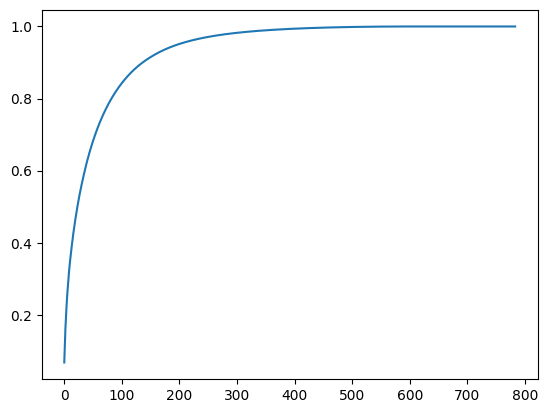

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# x = number of elements
# y = variance explained
